In [24]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 

data = np.random.normal(0, 1, 1000) + np.random.uniform(0, 1, 1000) * 200


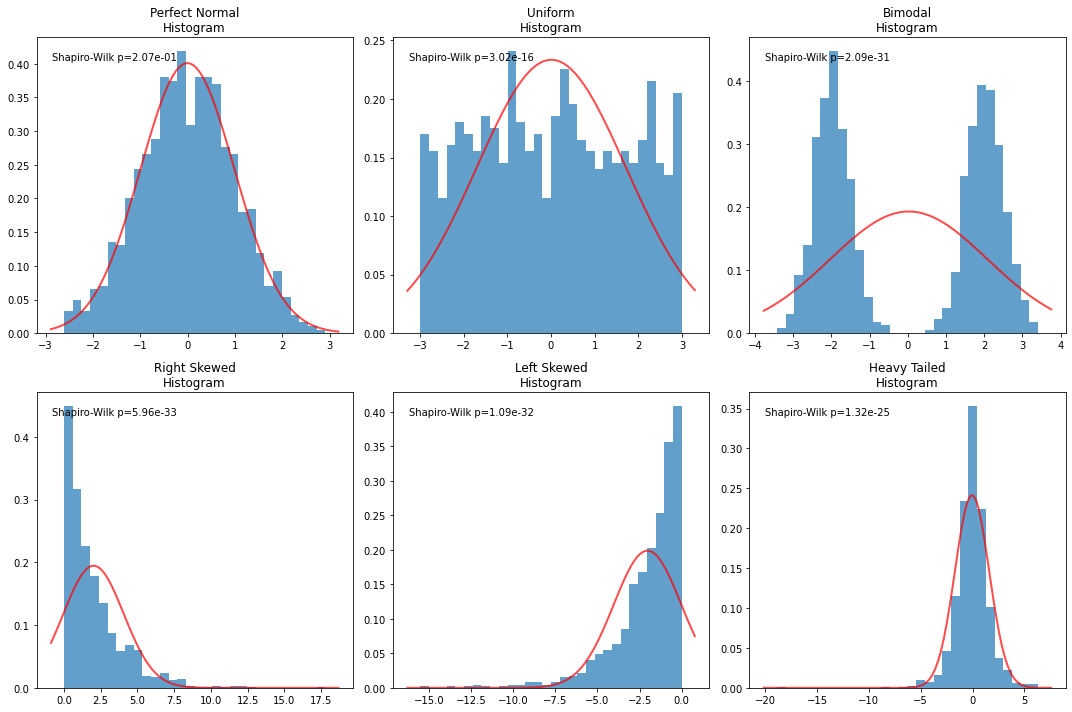

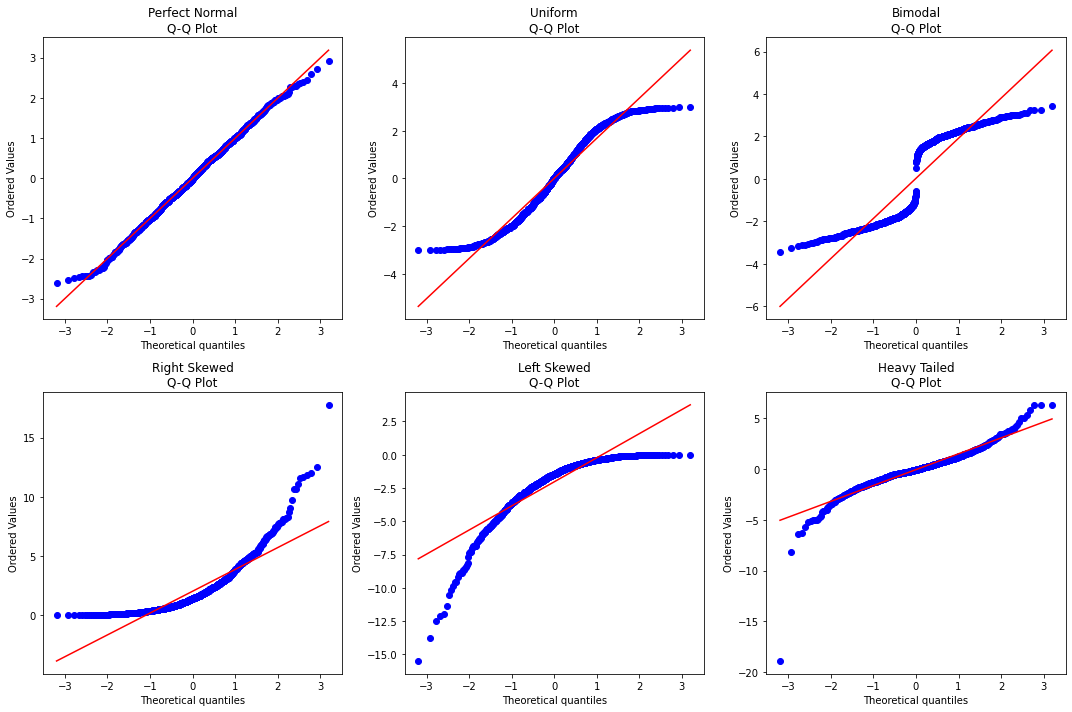

In [27]:
# Create figure with multiple subplots to show different levels of normality
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Generate different distributions
n_samples = 1000
normal_data = np.random.normal(0, 1, n_samples)
uniform_data = np.random.uniform(-3, 3, n_samples)
bimodal_data = np.concatenate([np.random.normal(-2, 0.5, n_samples//2), 
                              np.random.normal(2, 0.5, n_samples//2)])
skewed_data = np.random.exponential(2, n_samples)
heavy_tailed = np.random.standard_t(df=3, size=n_samples)
original_data = data
# Generate left skewed data by negating exponential distribution
left_skewed = -np.random.exponential(2, n_samples)

# Update distributions list to include left skewed and remove original data
distributions = [
    (normal_data, "Perfect Normal"),
    (uniform_data, "Uniform"),
    (bimodal_data, "Bimodal"),
    (skewed_data, "Right Skewed"),
    (left_skewed, "Left Skewed"),
    (heavy_tailed, "Heavy Tailed")
]

# Plot histograms and QQ plots for each distribution
for idx, (data_dist, title) in enumerate(distributions):
    row = idx // 3
    col = idx % 3
    
    # Plot histogram
    axes[row, col].hist(data_dist, bins=30, density=True, alpha=0.7)
    axes[row, col].set_title(f'{title}\nHistogram')
    
    # Add normal curve to histogram
    xmin, xmax = axes[row, col].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    axes[row, col].plot(x, stats.norm.pdf(x, np.mean(data_dist), np.std(data_dist)), 
                       'r-', lw=2, alpha=0.7)
    
    # Perform Shapiro-Wilk test
    stat, p_value = stats.shapiro(data_dist)
    axes[row, col].text(0.05, 0.95, f'Shapiro-Wilk p={p_value:.2e}', 
                       transform=axes[row, col].transAxes, 
                       verticalalignment='top')

plt.tight_layout()
plt.show()

# Create a second figure for QQ plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, (data_dist, title) in enumerate(distributions):
    row = idx // 3
    col = idx % 3
    stats.probplot(data_dist, dist="norm", plot=axes[row, col])
    axes[row, col].set_title(f'{title}\nQ-Q Plot')

plt.tight_layout()
plt.show()


# Quantile-Quantile Plots (QQ plots) 

Quantile-Quantile plots, also known as QQ plots, are a useful tool for comparing data distributions. This notebook will explain what QQ plots are and how to interpret them. The concept of quantiles will be used, which are points in a distribution that relate to the rank order of values in that distribution. For more information on quantiles, refer to the StatQuest video on quantiles and percentiles.

## What is a QQ plot?

A QQ plot is a graphical tool to help us assess if a dataset follows a theoretical distribution. It is constructed by plotting the quantiles of the data against the quantiles of the chosen theoretical distribution. If the data follows the theoretical distribution, the points in the QQ plot will roughly fall on the line $y = x$.

## How to construct a QQ plot?

Here are the steps to construct a QQ plot:

1. **Sort your data**: Arrange the data points from least to greatest.
2. **Calculate Quantiles**: Assign each data point a quantile based on its position in the sorted list.
3. **Choose a theoretical distribution and calculate its quantiles**: This could be any distribution like Normal, Uniform etc. The chosen distribution should have the same number of quantiles as in the data.
4. **Create the plot**: Plot the quantiles from the data (on y-axis) against the quantiles from the theoretical distribution (on x-axis).
5. **Interpret the plot**: If the data follows the theoretical distribution, the points will approximately lie on the line $y = x$. If the points deviate from this line, it suggests that the data may not follow the theoretical distribution.

Let's see an example on how to create a QQ plot in Python.

In [ ]:
# Import necessary libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(0)
data = np.random.normal(0, 1, 1000)

# Calculate quantiles
quantiles = stats.probplot(data, dist="norm", plot=plt)
plt.show()

The red line in the above plot is the line $y = x$, which represents the theoretical quantiles. The blue dots represent the quantiles of our data. As we can see, the blue dots approximately follow the red line, suggesting that our data follows a normal distribution.

QQ plots can also be used to compare two datasets to check if they come from the same distribution. To do this, we simply plot the quantiles of one dataset against the quantiles of the other dataset.

Remember that QQ plots do not prove that your data comes from a certain distribution, it only suggests that it could. Other tests, like the Kolmogorov-Smirnov test, can be used to statistically test the distribution of the data.